## Installing IceVision

In [2]:
# Download IceVision installation script:
!wget https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh

# Choose installation target: cuda11 or cuda10 or cpu
!bash icevision_install.sh cuda11 master

--2023-06-09 05:48:52--  https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2820 (2.8K) [text/plain]
Saving to: ‘icevision_install.sh’

icevision_install.s 100%[===================>]   2.75K  --.-KB/s    in 0s      

2023-06-09 05:48:52 (28.0 MB/s) - ‘icevision_install.sh’ saved [2820/2820]

Installing icevision + dependencices for cuda11
- Installing torch and its dependencies
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 GB 492.8 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 49.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 11.

In [3]:
# Restart kernel after installation:
import IPython

IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [1]:
from icevision.all import *

INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:70
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


0B [00:00, ?B/s]

INFO     - Downloading mmseg configs | icevision.models.mmseg.download_configs:download_mmseg_configs:33


0B [00:00, ?B/s]

In [2]:
print("Let's begin!")

Let's begin!


# Data Preparation

In [3]:
from pathlib import Path

extra_data_path = Path('/kaggle/input/b-m-g-a-extra-data')
!ls {extra_data_path}

Validation_Scheme_Dot_Scatter.png
Validation_Scheme_Line.png
Validation_Scheme_Tick_Mark.png
Validation_Scheme_X_Tick_Label.png
Validation_Scheme_Y_Tick_Label.png
corrupt_files_line_18px.csv
corrupt_files_scatter_16px.csv
corrupt_files_tick_mark_16px.csv
corrupt_files_x_tick_label_2px_pad.csv
corrupt_files_y_tick_label_2px_pad.csv
dot_600
horizontal_bar_23.pth
horizontal_bar_all_503
horizontal_bar_train_430
horizontal_bar_val_73
labels_dot_600_VOC_XML
labels_horizontal_bar_all_503_VOC_XML
labels_line_all_24932_VOC_XML
labels_scatter_11223_VOC_XML
labels_scatter_extra_176_VOC_XML
labels_tick_mark_60379_VOC_XML
labels_tick_mark_extra_345_VOC_XML
labels_x_tick_label_33947_VOC_XML
labels_x_tick_label_extra_346_VOC_XML
labels_y_tick_label_60415_VOC_XML
labels_y_tick_label_extra_314_VOC_XML
line__3.pth
line__5.pth
line_all_24932
rotated_vs_non_rotated_x_tick_labels.csv
rotation_dls.pkl
rotation_learner.pkl
rotation_model.pth
scatter_extra_176
tick_mark_5.pth
tick_mark_7.pth
tick_mark_extra_3

Let's create a single folder in our working directory, and copy all the relevant images into it.

In [4]:
working_dir = Path('/kaggle/working/')
all_images_path = working_dir/'all_dot_scatter_images'
all_images_path.mkdir()

First, we'll copy the competition dot plot images.

In [5]:
competition_dot_images_path = extra_data_path/'dot_600'/'dot_600'
i = 0
for file_path in competition_dot_images_path.glob("*.jpg"):
    i += 1
print(f"{i} competition dot plot images found.")

600 competition dot plot images found.


In [6]:
from tqdm.notebook import tqdm
import shutil

origin = str(competition_dot_images_path) + '/'
target = str(all_images_path) + '/'
i = 0
for file_path in tqdm(sorted(competition_dot_images_path.glob("*.jpg"))):
    file_name = str(file_path).split("/")[-1]
    shutil.copy(origin + file_name, target + file_name)
    i += 1
print(f"{i} files copied.")

  0%|          | 0/600 [00:00<?, ?it/s]

600 files copied.


Next, we'll copy the competition scatter plot images. To do this, we'll create a data frame (containing the scatter plot information) first.

In [7]:
competition_data_path = Path('/kaggle/input/benetech-making-graphs-accessible')
!ls {competition_data_path}

sample_submission.csv  test  train


In [8]:
train_path = competition_data_path/'train'
!ls {train_path}

annotations  images


In [9]:
competition_images_path = train_path/'images'
competition_annotations_path = train_path/'annotations'

In [10]:
import json

img_file_names = []
sources = []
chart_types = []

for file_path in tqdm(sorted(competition_annotations_path.glob("*.json"))):
    with open(file_path, "r") as json_file:
        json_file_name = str(file_path).split("/")[-1]
        without_ext = json_file_name.split(".")[0]
        img_file_name = without_ext + ".jpg"
        img_file_names.append(img_file_name)
        data = json.load(json_file)
        sources.append(data['source'])
        chart_types.append(data['chart-type'])

len(img_file_names), len(sources), len(chart_types)

  0%|          | 0/60578 [00:00<?, ?it/s]

(60578, 60578, 60578)

In [11]:
import pandas as pd

df = pd.DataFrame({'img_file_name': img_file_names, 'source': sources, 'chart_type': chart_types})
df

img_file_name     source    chart_type
0      0000ae6cbdb1.jpg  generated  vertical_bar
1      0003a50817cf.jpg  generated          line
2      0005413054c9.jpg  generated          line
3      0005e64fdc6e.jpg  generated       scatter
4      000614d3eab6.jpg  generated          line
...                 ...        ...           ...
60573  fffdafef9db0.jpg  generated          line
60574  fffdb0a69d5f.jpg  generated          line
60575  fffdc83973fc.jpg  generated           dot
60576  fffed04c1d49.jpg  generated          line
60577  fffee95fefd1.jpg  generated          line

[60578 rows x 3 columns]

In [12]:
scatter_df = df.loc[df['chart_type'] == 'scatter'].reset_index(drop=True)
scatter_df

img_file_name     source chart_type
0      0005e64fdc6e.jpg  generated    scatter
1      000631f33080.jpg  generated    scatter
2      001f896fb543.jpg  generated    scatter
3      003448490d96.jpg  generated    scatter
4      003645ee00b3.jpg  generated    scatter
...                 ...        ...        ...
11238  ffdf88928563.jpg  generated    scatter
11239  ffe6af62fb3c.jpg  generated    scatter
11240  ffe8d0186474.jpg  generated    scatter
11241  ffef15aacb4d.jpg  generated    scatter
11242  fffb88e41b0c.jpg  generated    scatter

[11243 rows x 3 columns]

We need to filter out the 'corrupt' images, i.e., the images where one or more bounding box lies outside the image.

In [13]:
corrupt_files_df = pd.read_csv(extra_data_path/'corrupt_files_scatter_16px.csv')
corrupt_files_df

corrupt_file
0   1683f135b1bd.json
1   18204b9effce.json
2   3dc14c65e735.json
3   3ef41bbc82c3.json
4   441949f91ec9.json
5   4ff1d8d1c084.json
6   55631f1b7488.json
7   68e0a90b3a60.json
8   7383706e573b.json
9   750c3876563f.json
10  81c665f41448.json
11  84b1b6aabe40.json
12  8aac1b4fd613.json
13  8ea15d9b6ce5.json
14  c36e3dc77d99.json
15  c5ccbaf08d30.json
16  cc1cee358496.json
17  d4148545a172.json
18  dc96b7708da2.json
19  f13adb5ae945.json

In [14]:
corrupt = corrupt_files_df['corrupt_file'].tolist()
corrupt = [c[:-5] + ".jpg" for c in corrupt]
corrupt[:5]

['1683f135b1bd.jpg',
 '18204b9effce.jpg',
 '3dc14c65e735.jpg',
 '3ef41bbc82c3.jpg',
 '441949f91ec9.jpg']

In [15]:
scatter_df = scatter_df.loc[~ scatter_df['img_file_name'].isin(corrupt)].reset_index(drop=True)
len(scatter_df)

11223

In [16]:
origin = str(competition_images_path) + '/'
target = str(all_images_path) + '/'
i = 0
for i in tqdm(range(len(scatter_df))):
    file_name = scatter_df['img_file_name'][i]
    shutil.copy(origin + file_name, target + file_name)
    i += 1
print(f"{i} files copied.")

  0%|          | 0/11223 [00:00<?, ?it/s]

11223 files copied.


Finally, we'll copy the extra scatter plot images.

In [17]:
extra_images_path = extra_data_path/'scatter_extra_176'/'scatter_extra_176'
i = 0
for file_path in extra_images_path.glob("*.jpg"):
    i += 1
print(f"{i} extra scatter plot images found.")

176 extra scatter plot images found.


In [18]:
origin = str(extra_images_path) + '/'
target = str(all_images_path) + '/'
i = 0
for file_path in extra_images_path.glob("*.jpg"):
    file_name = str(file_path).split("/")[-1]
    shutil.copy(origin + file_name, target + file_name)
    i += 1
print(f"{i} files copied.")

176 files copied.


Let's see how many images we have in total.

In [19]:
i = 0
for file_path in all_images_path.glob("*.jpg"):
    i += 1
print(f"{i} dot plot & scatter plot images found.")

11999 dot plot & scatter plot images found.


In [20]:
600 + 11223 + 176

11999

Similarly, let's create a single folder in our working directory, and copy all the relevant VOC XML files into it.

In [21]:
all_VOC_XML_path = working_dir/'all_dot_scatter_VOC_XML_files'
all_VOC_XML_path.mkdir()

First, we'll copy the competition dot plot VOC XML files.

In [22]:
competition_dot_VOC_XML_path = extra_data_path/'labels_dot_600_VOC_XML'/'labels_dot_600_VOC_XML'
i = 0
for file_path in competition_dot_VOC_XML_path.glob("*.xml"):
    i += 1
print(f"{i} dot plot VOC XML files found.")

600 dot plot VOC XML files found.


In [23]:
origin = str(competition_dot_VOC_XML_path) + '/'
target = str(all_VOC_XML_path) + '/'
i = 0
for file_path in tqdm(sorted(competition_dot_VOC_XML_path.glob("*.xml"))):
    file_name = str(file_path).split("/")[-1]
    shutil.copy(origin + file_name, target + file_name)
    i += 1
print(f"{i} files copied.")

  0%|          | 0/600 [00:00<?, ?it/s]

600 files copied.


Next, we'll copy the competition scatter plot VOC XML files.

In [24]:
competition_scatter_VOC_XML_path = extra_data_path/'labels_scatter_11223_VOC_XML'
i = 0
for file_path in competition_scatter_VOC_XML_path.glob("*.xml"):
    i += 1
print(f"{i} competition scatter plot VOC XML files found.")

11223 competition scatter plot VOC XML files found.


In [25]:
origin = str(competition_scatter_VOC_XML_path) + '/'
target = str(all_VOC_XML_path) + '/'
i = 0
for i in tqdm(range(len(scatter_df))):
    file_name = scatter_df['img_file_name'][i]
    file_name = file_name[:-4] + ".xml"
    shutil.copy(origin + file_name, target + file_name)
    i += 1
print(f"{i} files copied.")

  0%|          | 0/11223 [00:00<?, ?it/s]

11223 files copied.


Finally, we'll copy the extra scatter plot VOC XML files.

In [26]:
extra_VOC_XML_path = extra_data_path/'labels_scatter_extra_176_VOC_XML'/'labels_scatter_extra_176_VOC_XML'
i = 0
for file_path in extra_VOC_XML_path.glob("*.xml"):
    i += 1
print(f"{i} extra scatter plot VOC XML files found.")

176 extra scatter plot VOC XML files found.


In [27]:
origin = str(extra_VOC_XML_path) + '/'
target = str(all_VOC_XML_path) + '/'
i = 0
for file_path in extra_VOC_XML_path.glob("*.xml"):
    file_name = str(file_path).split("/")[-1]
    shutil.copy(origin + file_name, target + file_name)
    i += 1
print(f"{i} files copied.")

176 files copied.


Let's see how many VOC XML files we have in total.

In [28]:
i = 0
for file_path in sorted(all_VOC_XML_path.glob("*.xml")):
    i += 1
print(f"{i} VOC XML files found.")

11999 VOC XML files found.


In [29]:
600 + 11223 + 176

11999

# Validation Scheme

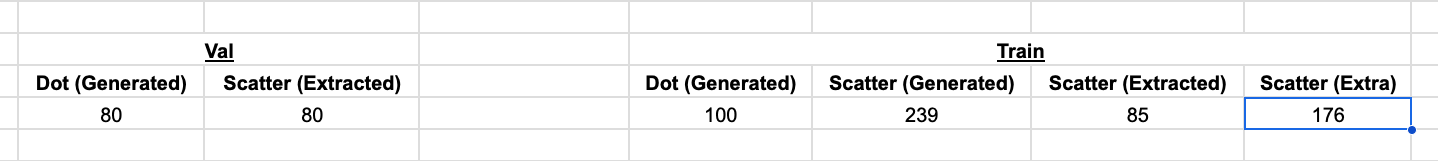

In [30]:
from PIL import Image

val_scheme = Image.open(extra_data_path/'Validation_Scheme_Dot_Scatter.png')
val_scheme

In [31]:
val_file_names = []
train_file_names = []

In [32]:
dot_file_names = []
for file_path in sorted(competition_dot_images_path.glob("*.jpg")):
    file_name = str(file_path).split("/")[-1]
    dot_file_names.append(file_name)
len(dot_file_names)

600

In [33]:
import random

random.seed(42)
random.shuffle(dot_file_names)
dot_file_names[:5]

['e679eaee8713_jpg.rf.5966c67020378e784f3432460645b387.jpg',
 'ffe511433cd1_jpg.rf.3ecd838a3d6c21f2923224de2ccf839f.jpg',
 'be4652e46e36_jpg.rf.b13e9e2cf55a263e5097e70e6094553e.jpg',
 'bd922cbc43d4_jpg.rf.917104c76a7f368cd87d01a527363f1b.jpg',
 '8184579b2a38_jpg.rf.57f69cc6038f05cef98c03e6dc724087.jpg']

In [34]:
val_file_names.extend(dot_file_names[:80])
len(val_file_names)

80

In [35]:
train_file_names.extend(dot_file_names[80:180])
len(train_file_names)

100

In [36]:
scatter_extracted = scatter_df.loc[scatter_df['source'] == 'extracted']
len(scatter_extracted)

165

Shuffle the rows:

In [37]:
scatter_extracted = scatter_extracted.sample(frac=1, random_state=42, ignore_index=True)
scatter_extracted

img_file_name     source chart_type
0    c922d545c9eb.jpg  extracted    scatter
1    b056ead34cc1.jpg  extracted    scatter
2    c226d88f9d0d.jpg  extracted    scatter
3    52b727dcd08c.jpg  extracted    scatter
4    9193f7226431.jpg  extracted    scatter
..                ...        ...        ...
160  6dc9181c0b1c.jpg  extracted    scatter
161  a29e838e50f3.jpg  extracted    scatter
162  19179172b666.jpg  extracted    scatter
163  8ede2763cf3a.jpg  extracted    scatter
164  9e0e89585476.jpg  extracted    scatter

[165 rows x 3 columns]

In [38]:
extracted_in_val = scatter_extracted.iloc[:80]
val_file_names.extend(extracted_in_val['img_file_name'].tolist())
len(val_file_names)

160

In [39]:
extracted_in_train = scatter_extracted.iloc[80:]
train_file_names.extend(extracted_in_train['img_file_name'].tolist())
len(train_file_names)

185

In [40]:
scatter_generated = scatter_df.loc[scatter_df['source'] == 'generated']
len(scatter_generated)

11058

Shuffle the rows:

In [41]:
scatter_generated = scatter_generated.sample(frac=1, random_state=42, ignore_index=True)
scatter_generated

img_file_name     source chart_type
0      dcfce27c1aaf.jpg  generated    scatter
1      ae6a8c4f6bea.jpg  generated    scatter
2      f50232cb2237.jpg  generated    scatter
3      44aaf237cf71.jpg  generated    scatter
4      7f3a26b8a038.jpg  generated    scatter
...                 ...        ...        ...
11053  843e277d97b2.jpg  generated    scatter
11054  784eff4a9d5c.jpg  generated    scatter
11055  7cff79e5dc7d.jpg  generated    scatter
11056  13e2421697eb.jpg  generated    scatter
11057  a87e215b6664.jpg  generated    scatter

[11058 rows x 3 columns]

In [42]:
generated_in_train = scatter_generated.iloc[:239]
train_file_names.extend(generated_in_train['img_file_name'].tolist())
len(train_file_names)

424

In [43]:
for file_path in extra_images_path.glob("*.jpg"):
    file_name = str(file_path).split("/")[-1]
    train_file_names.append(file_name)
len(train_file_names)

600

---

In [44]:
val_file_names = [f_n[:-4] for f_n in val_file_names]
random.seed(42)
random.shuffle(val_file_names)
val_file_names[:5]

['edd6276dd20b_jpg.rf.750dd648642198363a8848272de8113a',
 'd7b67c32fd11',
 '312313d42699',
 '21369af05739_jpg.rf.ac563c9c6bffa801affef27af469ae61',
 'd2f7ea094baf']

In [45]:
train_file_names = [f_n[:-4] for f_n in train_file_names]
random.seed(42)
random.shuffle(train_file_names)
train_file_names[:5]

['53', '147', '58', '45', '54d9b3c5fd53']

In [46]:
data_splitter = FixedSplitter([train_file_names, val_file_names])

In [47]:
# Create the parser:
parser = parsers.VOCBBoxParser(images_dir=all_images_path, annotations_dir=all_VOC_XML_path)

In [48]:
# Parse annotations to create records:
train_records, val_records = parser.parse(data_splitter, autofix=True)
type(train_records), type(val_records)

  0%|          | 0/11999 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/11999 [00:00<?, ?it/s]

(icevision.data.record_collection.RecordCollection,
 icevision.data.record_collection.RecordCollection)

In [49]:
parser.class_map

<ClassMap: {'background': 0, 'dot': 1}>

In [50]:
len(train_records), len(val_records)

(600, 160)

In [51]:
train_records[0]

BaseRecord

common: 
	- Image size ImgSize(width=761, height=511)
	- Filepath: /kaggle/working/all_dot_scatter_images/53.jpg
	- Img: None
	- Record ID: 53
detection: 
	- BBoxes: [<BBox (xmin:113, ymin:99, xmax:129, ymax:115)>, <BBox (xmin:587, ymin:215, xmax:603, ymax:231)>, <BBox (xmin:431, ymin:236, xmax:447, ymax:252)>, <BBox (xmin:488, ymin:367, xmax:504, ymax:383)>, <BBox (xmin:373, ymin:373, xmax:389, ymax:389)>, <BBox (xmin:269, ymin:393, xmax:285, ymax:409)>, <BBox (xmin:291, ymin:304, xmax:307, ymax:320)>, <BBox (xmin:291, ymin:297, xmax:307, ymax:313)>, <BBox (xmin:218, ymin:215, xmax:234, ymax:231)>, <BBox (xmin:117, ymin:290, xmax:133, ymax:306)>, <BBox (xmin:209, ymin:290, xmax:225, ymax:306)>, <BBox (xmin:131, ymin:229, xmax:147, ymax:245)>, <BBox (xmin:119, ymin:270, xmax:135, ymax:286)>, <BBox (xmin:166, ymin:215, xmax:182, ymax:231)>, <BBox (xmin:216, ymin:249, xmax:232, ymax:265)>, <BBox (xmin:181, ymin:276, xmax:197, ymax:292)>, <BBox (xmin:201, ymin:256, xmax:217, y

In [52]:
val_records[0]

BaseRecord

common: 
	- Image size ImgSize(width=512, height=296)
	- Filepath: /kaggle/working/all_dot_scatter_images/edd6276dd20b_jpg.rf.750dd648642198363a8848272de8113a.jpg
	- Img: None
	- Record ID: edd6276dd20b_jpg.rf.750dd648642198363a8848272de8113a
detection: 
	- BBoxes: [<BBox (xmin:386, ymin:205, xmax:409, ymax:225)>, <BBox (xmin:386, ymin:163, xmax:410, ymax:184)>, <BBox (xmin:386, ymin:185, xmax:409, ymax:203)>, <BBox (xmin:385, ymin:143, xmax:409, ymax:163)>, <BBox (xmin:386, ymin:227, xmax:409, ymax:245)>, <BBox (xmin:456, ymin:227, xmax:480, ymax:245)>, <BBox (xmin:456, ymin:122, xmax:480, ymax:143)>, <BBox (xmin:455, ymin:184, xmax:479, ymax:203)>, <BBox (xmin:456, ymin:163, xmax:480, ymax:184)>, <BBox (xmin:456, ymin:205, xmax:480, ymax:225)>, <BBox (xmin:176, ymin:205, xmax:200, ymax:225)>, <BBox (xmin:106, ymin:227, xmax:130, ymax:246)>, <BBox (xmin:106, ymin:205, xmax:130, ymax:226)>, <BBox (xmin:455, ymin:142, xmax:479, ymax:163)>, <BBox (xmin:176, ymin:185, xmax:200

# Model Training

In [53]:
import os
import random
import numpy as np
import torch

def seed_everything(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [54]:
128 * 5

640

In [55]:
# Transforms:
image_size = 640
train_tfms = tfms.A.Adapter([tfms.A.ColorJitter(p=0.5), *tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])
val_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])
type(train_tfms), type(val_tfms)

(icevision.tfms.albumentations.albumentations_adapter.Adapter,
 icevision.tfms.albumentations.albumentations_adapter.Adapter)

In [56]:
train_tfms.tfms_list

[ColorJitter(always_apply=False, p=0.5, brightness=[0.8, 1.2], contrast=[0.8, 1.2], saturation=[0.8, 1.2], hue=[-0.2, 0.2]),
 LongestMaxSize(always_apply=False, p=1, max_size=640, interpolation=1),
 PadIfNeeded(always_apply=False, p=1.0, min_height=640, min_width=640, pad_height_divisor=None, pad_width_divisor=None, border_mode=0, value=[124, 116, 104], mask_value=None),
 Normalize(always_apply=False, p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0)]

In [57]:
val_tfms.tfms_list

[LongestMaxSize(always_apply=False, p=1, max_size=640, interpolation=1),
 PadIfNeeded(always_apply=False, p=1.0, min_height=640, min_width=640, pad_height_divisor=None, pad_width_divisor=None, border_mode=0, value=[124, 116, 104], mask_value=None),
 Normalize(always_apply=False, p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0)]

In [58]:
# `Dataset` objects:
train_ds = Dataset(train_records, train_tfms)
val_ds = Dataset(val_records, val_tfms)
type(train_ds), type(val_ds)

(icevision.data.dataset.Dataset, icevision.data.dataset.Dataset)

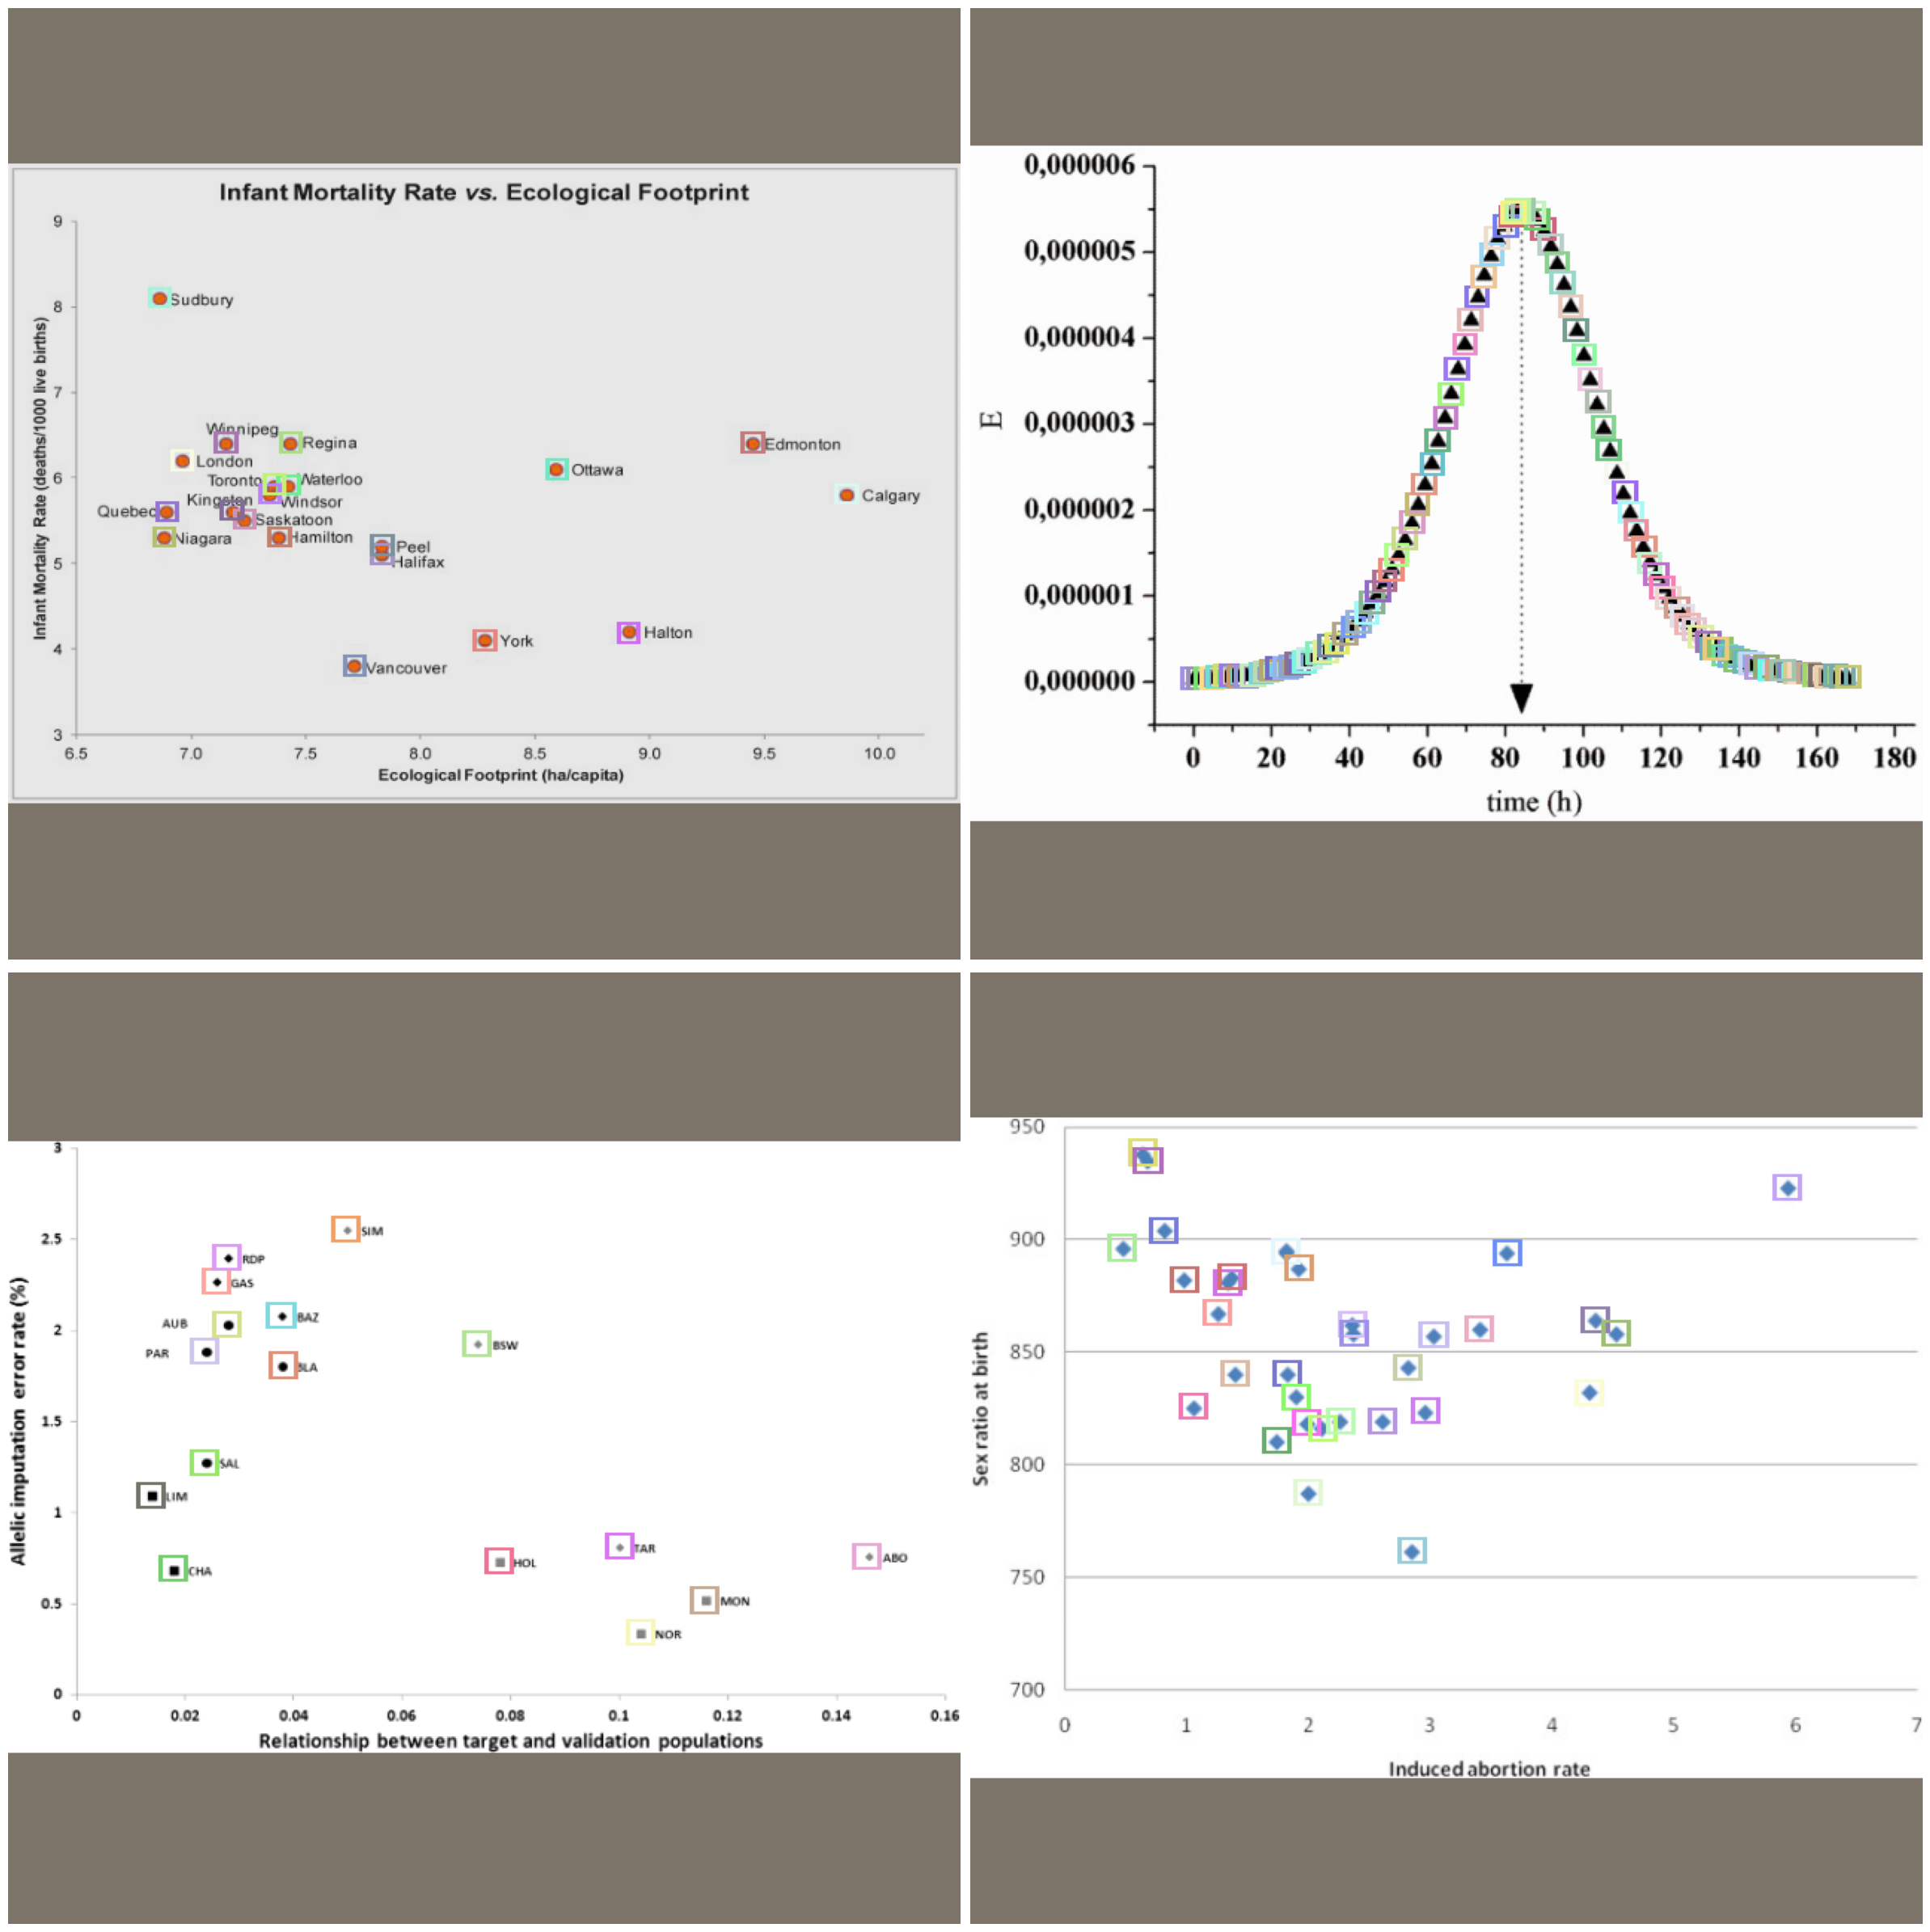

In [59]:
# Show a few elements of `train_ds` with transformations applied:
samples = [train_ds[i] for i in range(4)]
show_samples(samples, display_label=False, ncols=2)

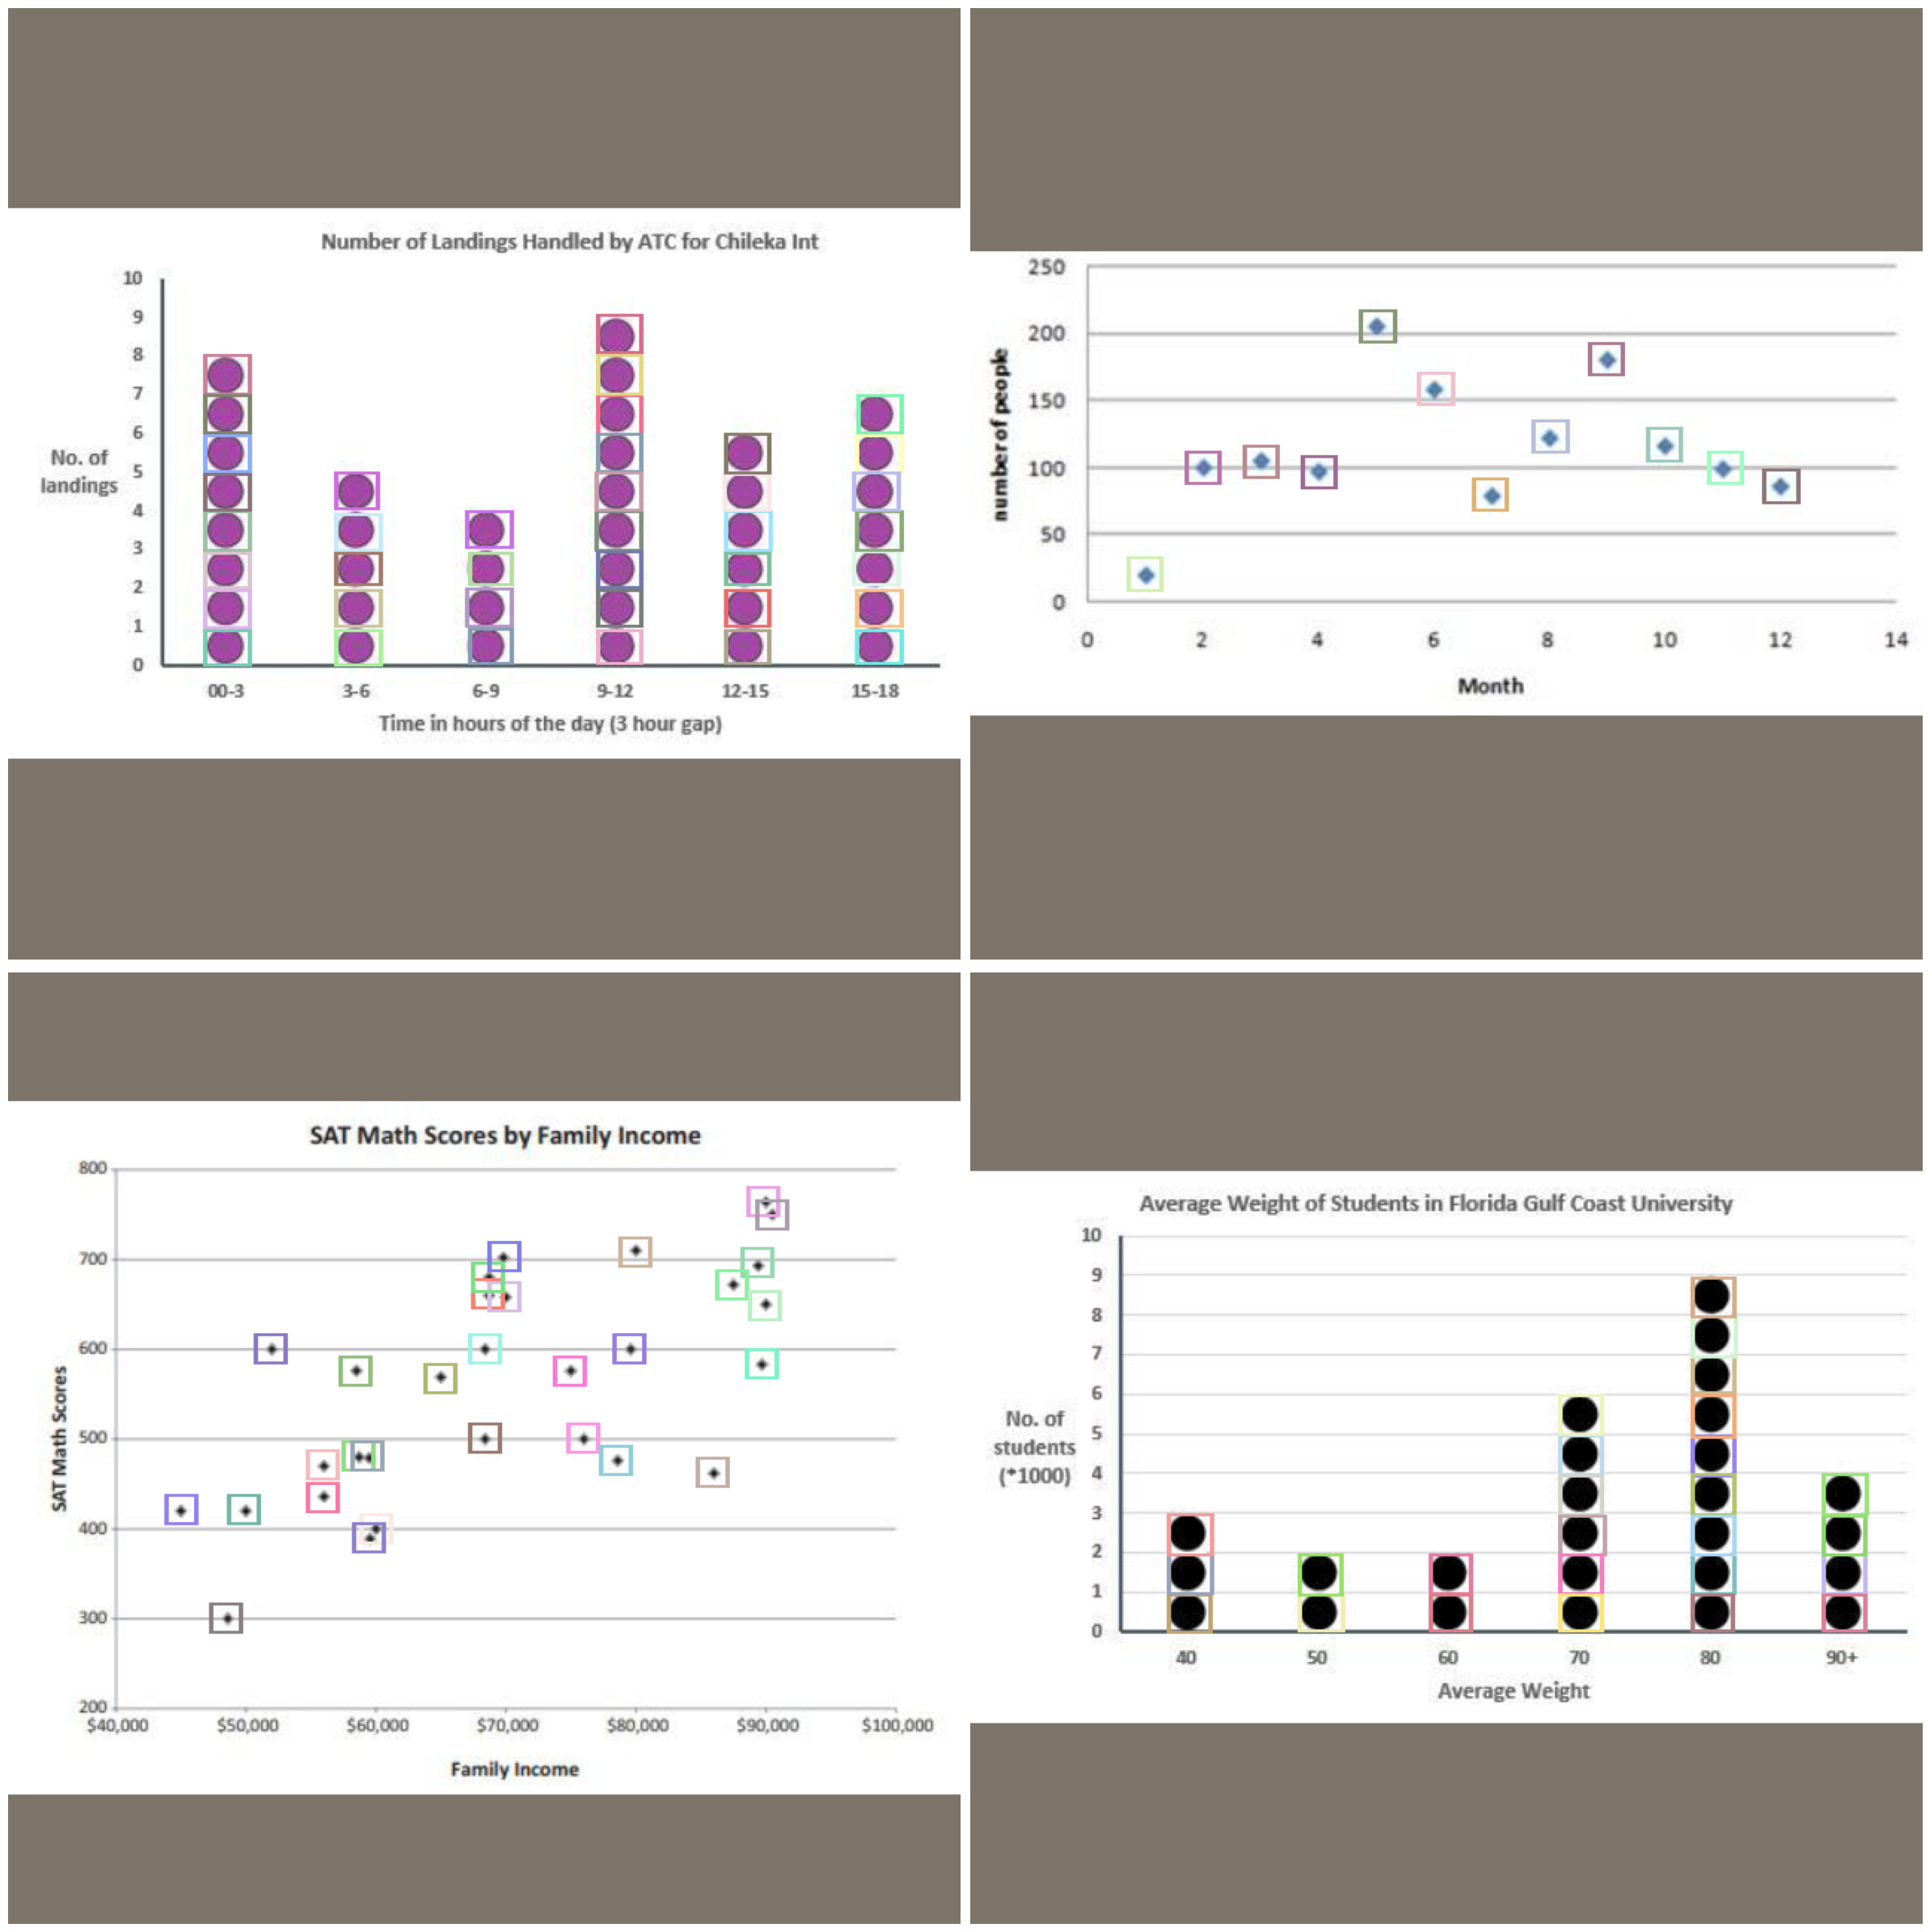

In [60]:
# Show a few elements of `val_ds` with transformations applied:
samples = [val_ds[i] for i in range(4)]
show_samples(samples, display_label=False, ncols=2)

In [61]:
extra_args = {}

model_type = models.torchvision.faster_rcnn
backbone = model_type.backbones.resnet50_fpn

model_type, backbone, extra_args

(<module 'icevision.models.torchvision.faster_rcnn' from '/opt/conda/lib/python3.7/site-packages/icevision/models/torchvision/faster_rcnn/__init__.py'>,
 {})

In [62]:
# Instantiate the model:
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(parser.class_map), **extra_args)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [63]:
train_dl = model_type.train_dl(train_ds, batch_size=8, num_workers=2, shuffle=True)
val_dl = model_type.valid_dl(val_ds, batch_size=8, num_workers=2, shuffle=False)

In [64]:
len(train_dl), len(val_dl)

(75, 20)

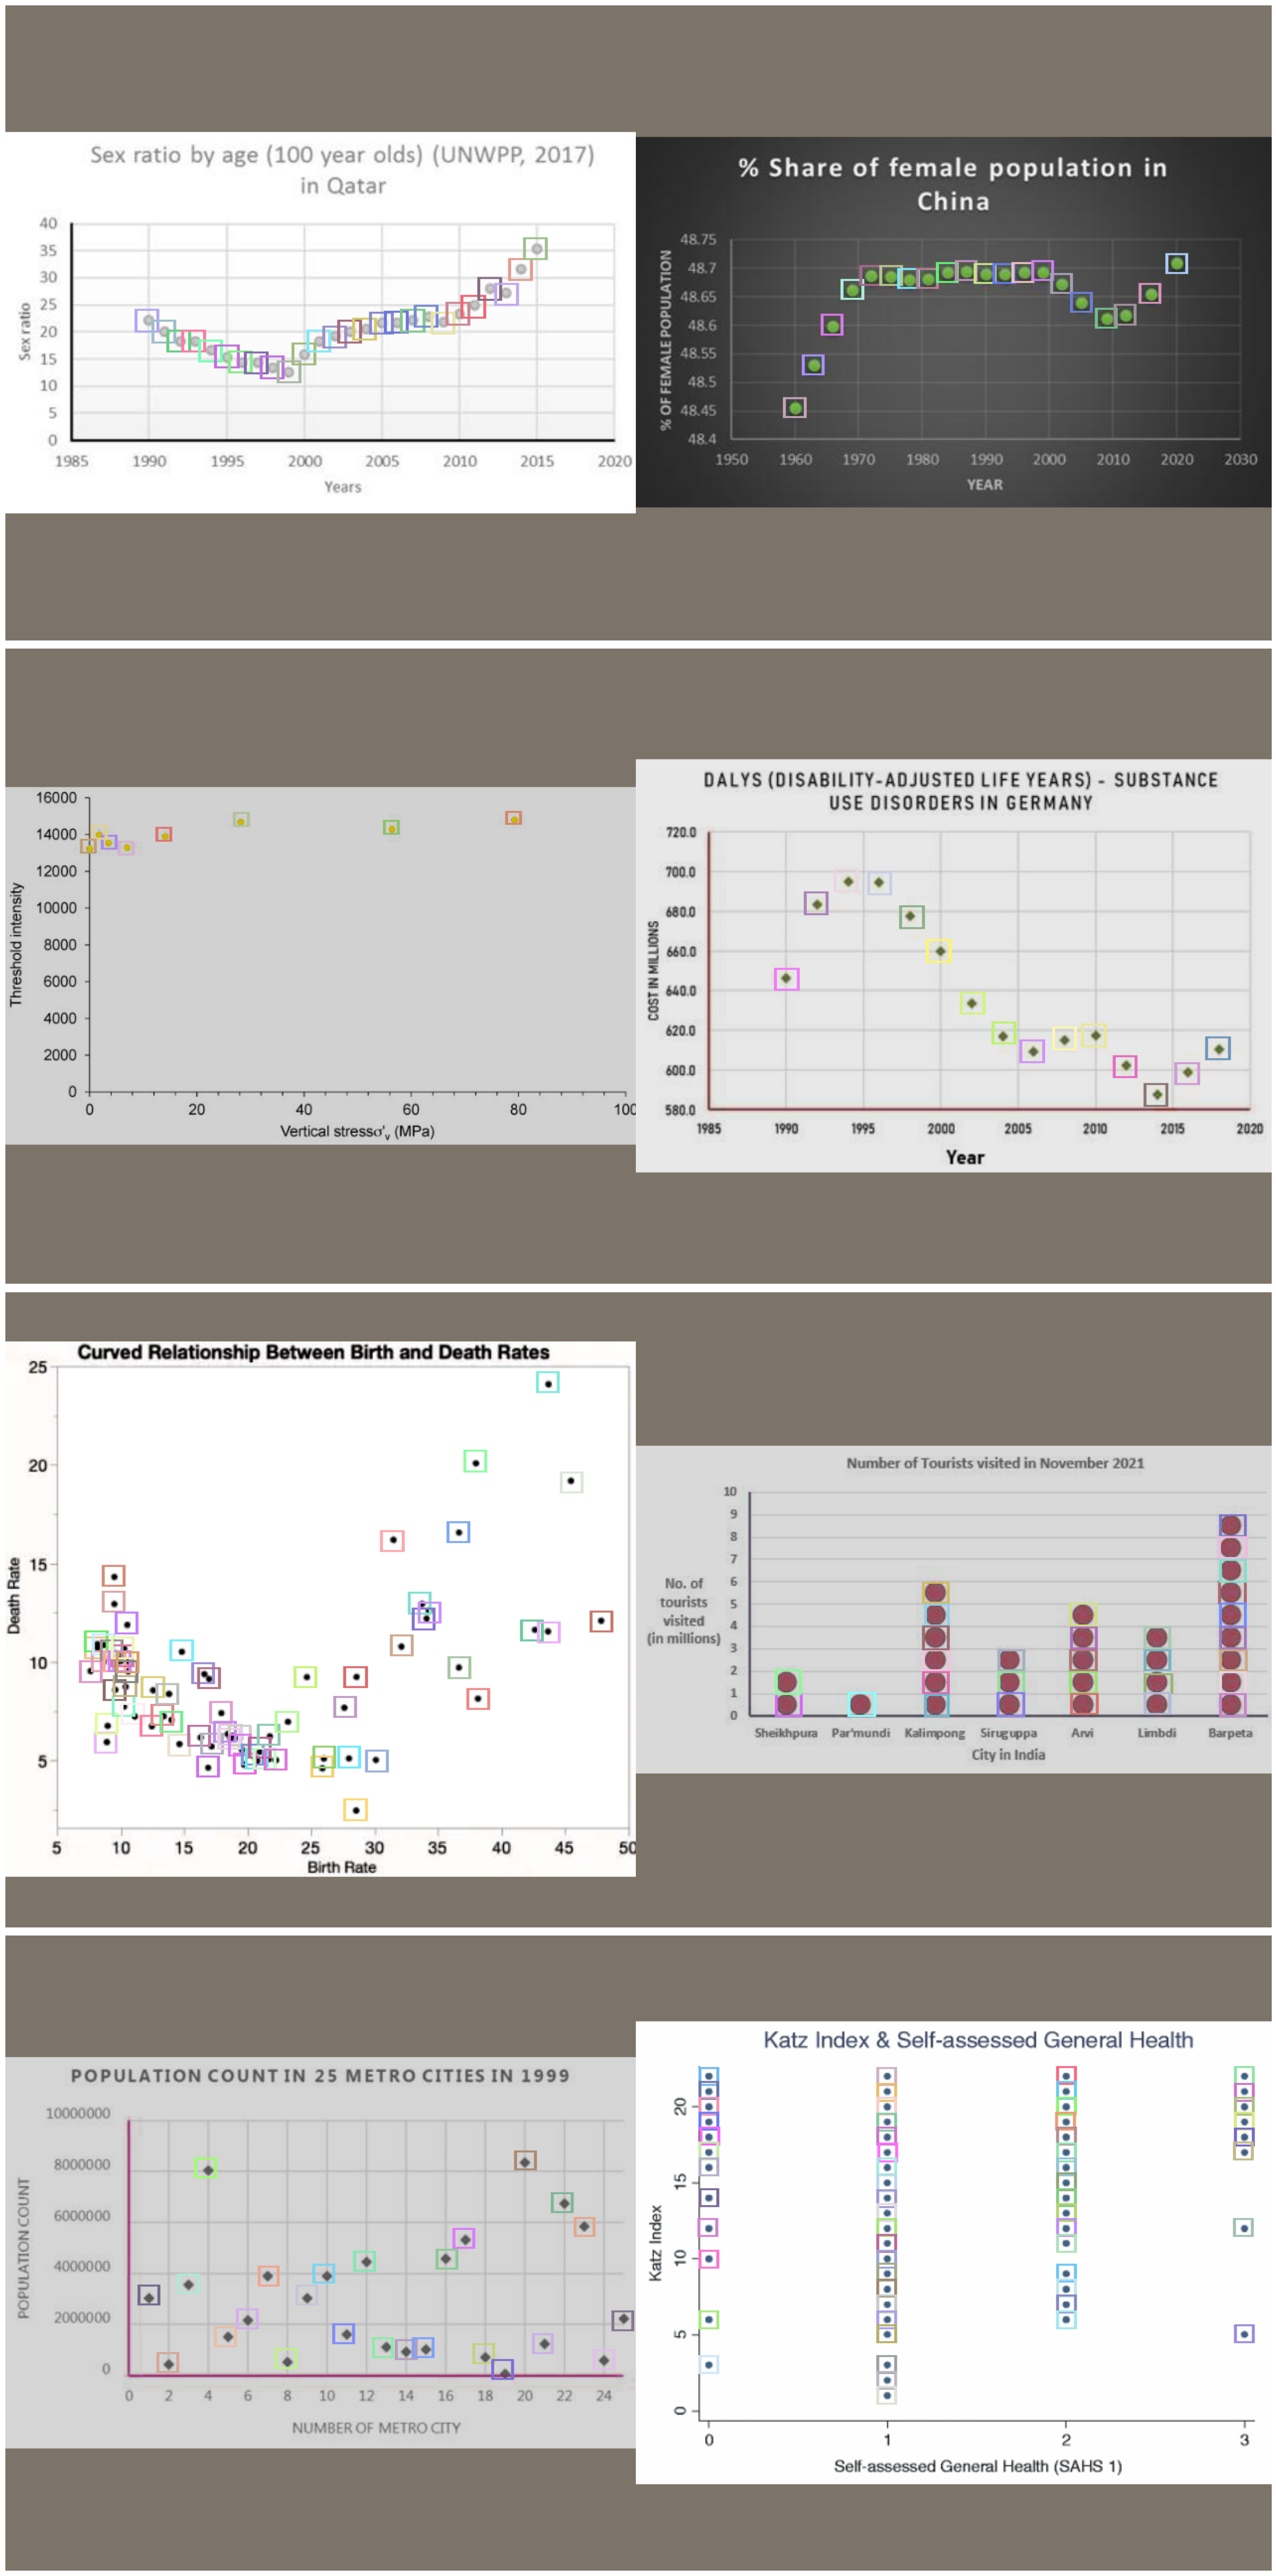

In [65]:
model_type.show_batch(first(train_dl), display_label=False, ncols=2)

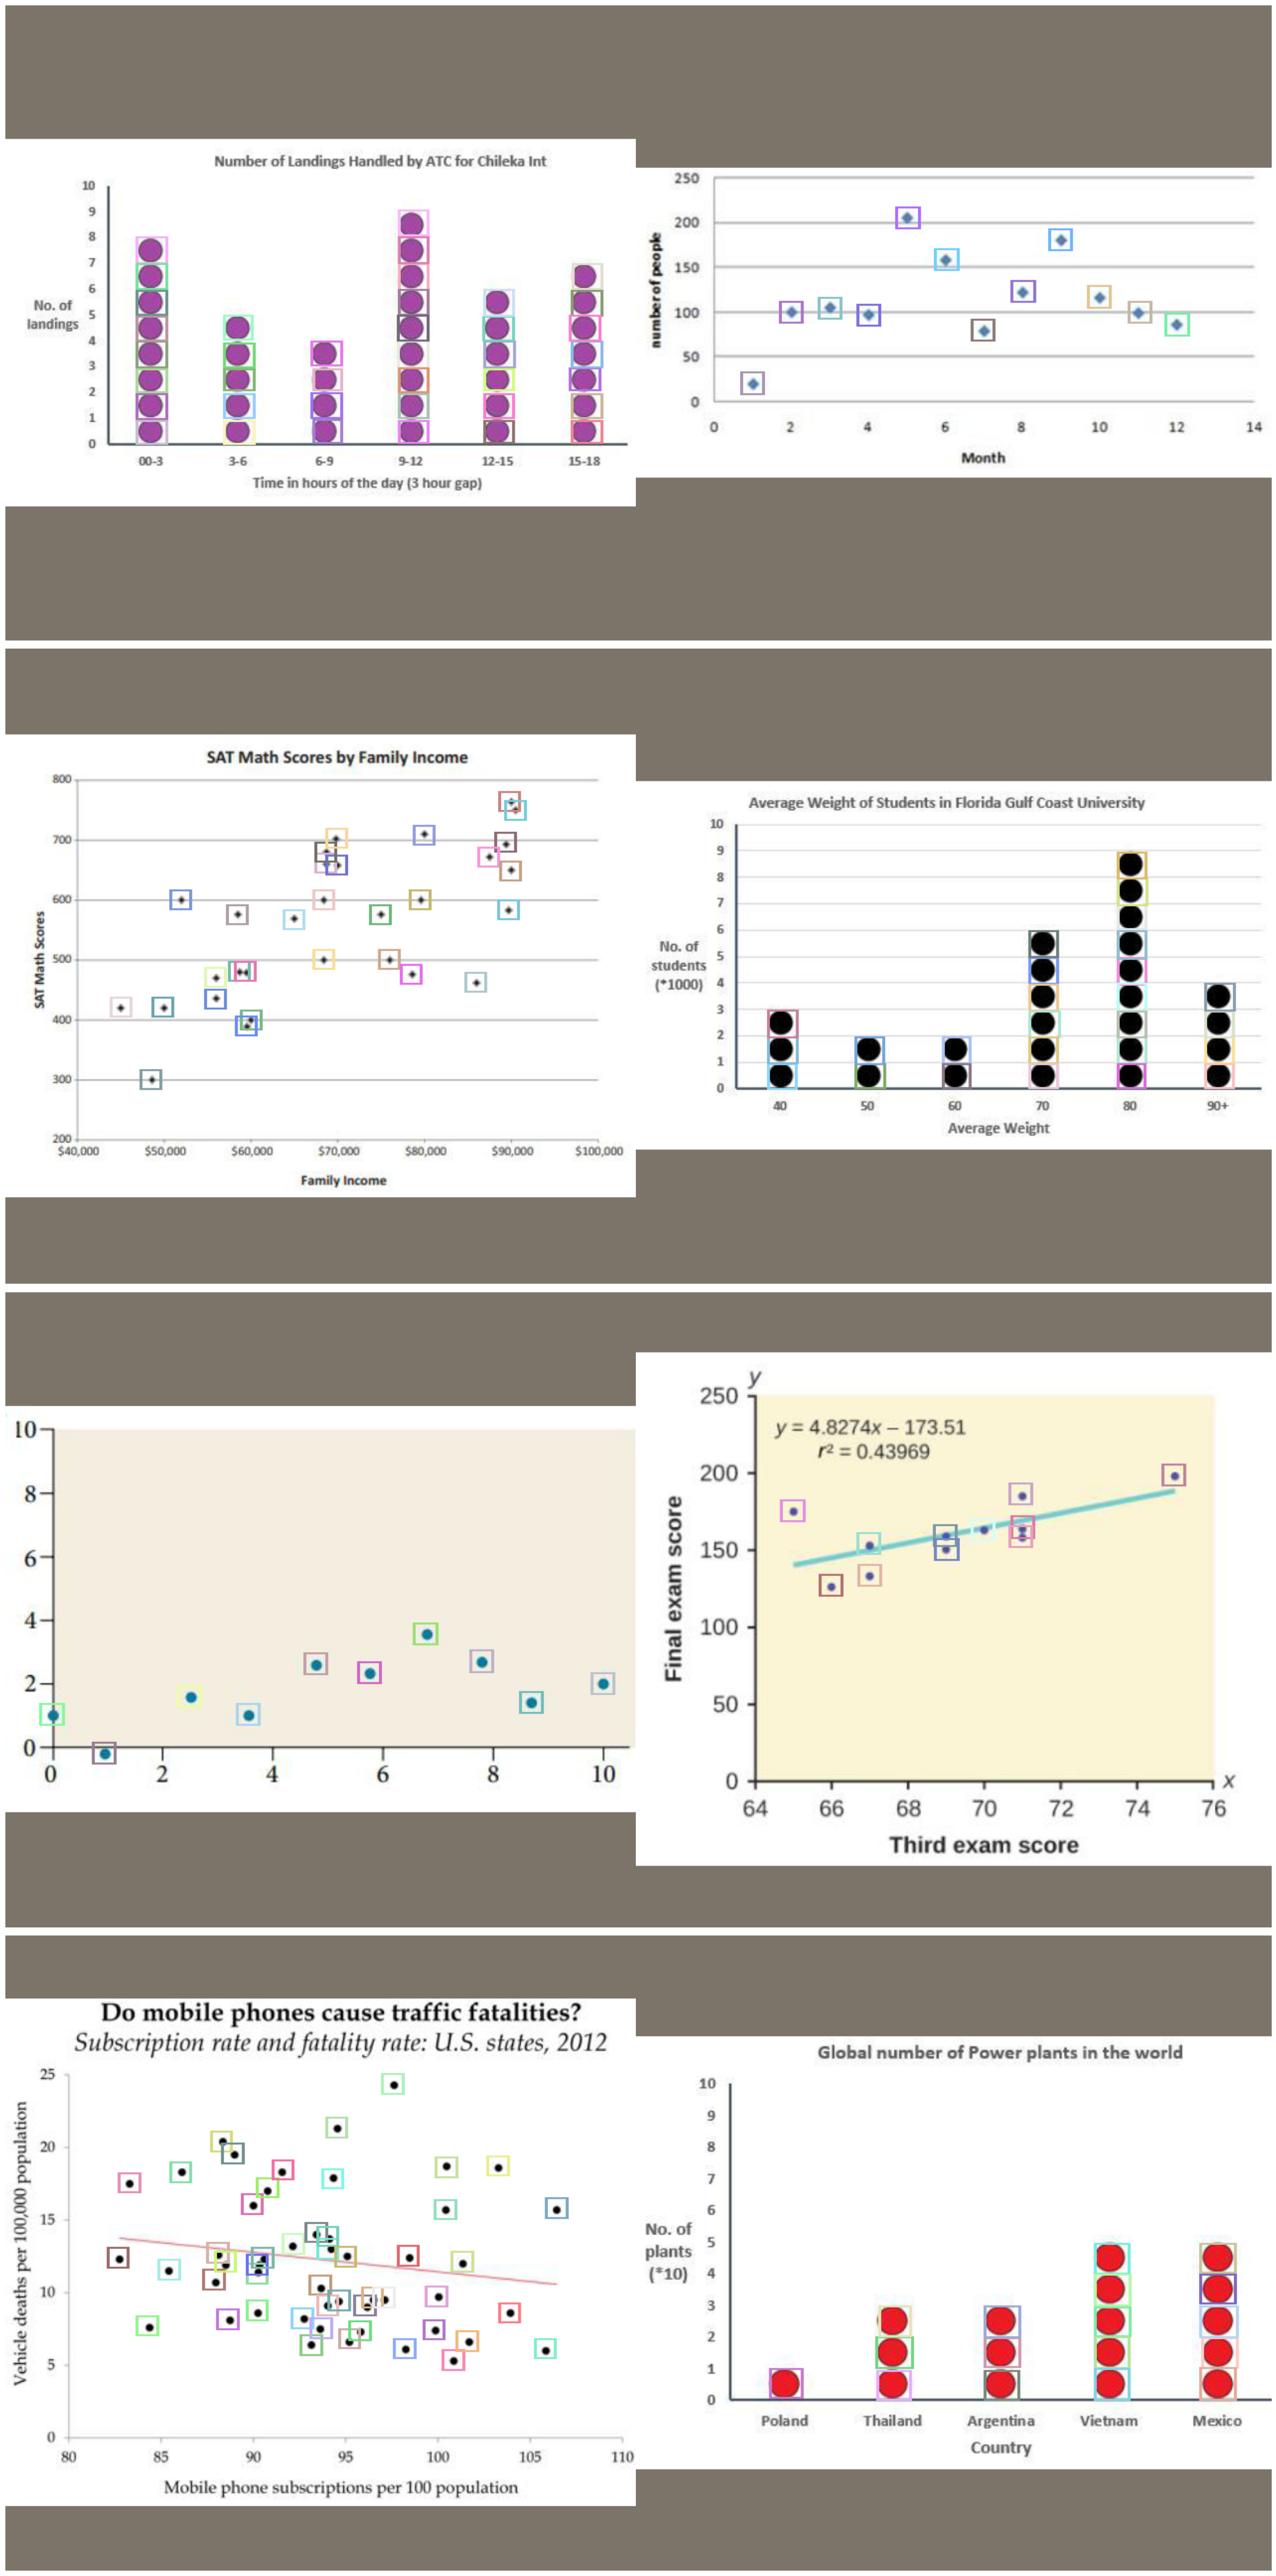

In [66]:
model_type.show_batch(first(val_dl), display_label=False, ncols=2)

In [67]:
class Accuracy(SimpleConfusionMatrix):
    def __init__(self):
        super().__init__()
    
    def finalize(self):
        assert len(self.target_labels) == len(self.predicted_labels)
        label_ids = list(self.class_map._class2id.values())
        self.confusion_matrix = sklearn.metrics.confusion_matrix(
            y_true=self.target_labels,
            y_pred=self.predicted_labels,
            labels=label_ids,
        )
        accuracy = (self.confusion_matrix[0, 0] + self.confusion_matrix[1, 1]) / self.confusion_matrix.sum()
        if self.print_summary:
            print(self.confusion_matrix)
        self._reset()
        return {"accuracy": accuracy}

In [68]:
class NumErrors(SimpleConfusionMatrix):
    def __init__(self):
        super().__init__()
    
    def finalize(self):
        assert len(self.target_labels) == len(self.predicted_labels)
        label_ids = list(self.class_map._class2id.values())
        self.confusion_matrix = sklearn.metrics.confusion_matrix(
            y_true=self.target_labels,
            y_pred=self.predicted_labels,
            labels=label_ids,
        )
        num_errors = self.confusion_matrix[0, 1] + self.confusion_matrix[1, 0]
        if self.print_summary:
            print(self.confusion_matrix)
        self._reset()
        return {"num_errors": num_errors}

In [69]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox), SimpleConfusionMatrix(), Accuracy(), NumErrors()]

In [70]:
from fastai.callback.tracker import SaveModelCallback

cb = SaveModelCallback(monitor='Accuracy', fname='dot_scatter_', every_epoch=True)

In [71]:
learn = model_type.fastai.learner(dls=[train_dl, val_dl], model=model, metrics=metrics, cbs=[cb])

/opt/conda/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


SuggestedLRs(valley=0.00015848931798245758)

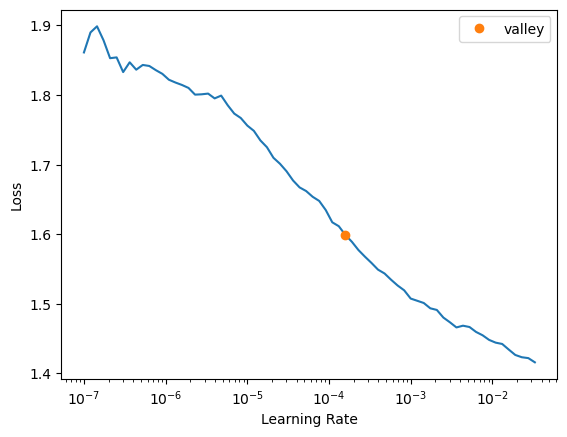

In [72]:
learn.lr_find()

In [73]:
learn.fine_tune(10, 2e-3, freeze_epochs=1)

In [74]:
learn.load('dot_scatter__8')

/opt/conda/lib/python3.7/site-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [75]:
import icevision

icevision.__version__

'0.12.0'

In [76]:
from icevision.models import *

save_icevision_checkpoint(
    model, 
    model_name='torchvision.faster_rcnn', 
    backbone_name='resnet50_fpn',
    classes=parser.class_map.get_classes(), 
    img_size=image_size, 
    filename="faster_rcnn-dot_scatter.pth", 
    meta={'icevision_version': '0.12.0'}
)

In [77]:
checkpoint_and_model = model_from_checkpoint('/kaggle/working/faster_rcnn-dot_scatter.pth')
type(checkpoint_and_model)

load checkpoint from local path: /kaggle/working/faster_rcnn-dot_scatter.pth


dict

In [78]:
class_map = checkpoint_and_model["class_map"]
img_size = checkpoint_and_model["img_size"]
model_type = checkpoint_and_model["model_type"]
backbone = checkpoint_and_model["backbone"]
loaded_model = checkpoint_and_model["model"]

# Model Evaluation

In [79]:
learn.validate(dl=val_dl)

(#5) [0.2573506236076355,0.6949399978186848,-1,0.9824307565109549,85]

The above list contains `valid_loss`, `COCOMetric`, `SimpleConfusionMatrix`, `Accuracy` and `NumErrors` corresponding to the best epoch.

In [80]:
metrics[1].confusion_matrix

array([[   0,    0],
       [  85, 4753]])

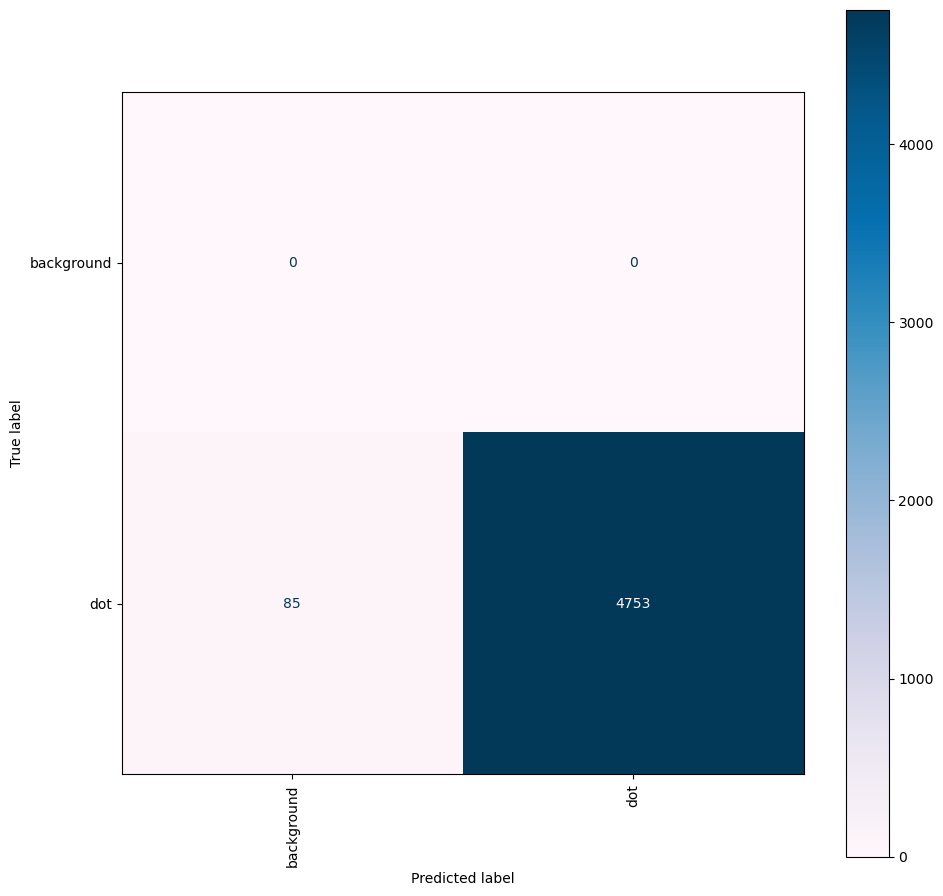

In [81]:
metrics[1].plot()

Let's examine the model's predictions on 25 randomly chosen images from the validation set.

In [82]:
val_file_names = [f_n + '.jpg' for f_n in val_file_names]

In [83]:
random.seed(42)
random.shuffle(val_file_names)
print(val_file_names[:25])

['8a7867569982_jpg.rf.6350de55db18a3b75c33c35dcf7e40b6.jpg', 'f85bb9a1a051.jpg', '737fac2f8edb_jpg.rf.590856183f9f1bbdb81a101e4b99ccbc.jpg', 'a8131c4adf39_jpg.rf.8c941b5210118a9ee7cf904bcc598818.jpg', '241b5d921b2f.jpg', 'bbca26b3abcb.jpg', '4d6d80aed4b7.jpg', '07c882b97e67.jpg', 'ffe511433cd1_jpg.rf.3ecd838a3d6c21f2923224de2ccf839f.jpg', '650cd195d2ba_jpg.rf.47f1ad4e161d5d5ba70865ab46406f4b.jpg', '2bb6e76a5b35.jpg', '536b28ae1a7e.jpg', '8bbf53f02f90_jpg.rf.bcf3fb509d9dc1395024d0b94ef4353c.jpg', 'b84525206a6e_jpg.rf.48570fa13c935fc9a6ee7d3b303e55f1.jpg', '5fd0b2fd2087.jpg', '68d2ae351e4f_jpg.rf.cc1ca70d7954ad2c42d36c37bbf65a72.jpg', 'edd6276dd20b_jpg.rf.750dd648642198363a8848272de8113a.jpg', 'a96cf5e26a01_jpg.rf.fece1ba6818291b38a11204332fba0b0.jpg', '98e63edc1c82.jpg', '6839aafcf23e_jpg.rf.0bec42b8edd06a1135f3c11f752833b1.jpg', '6373ef9a9333_jpg.rf.daeff7a24d81afbd1eb08c87ecfc88fa.jpg', '220436d228aa.jpg', '06f0e45acf73_jpg.rf.eaeec7111d53984e8d4c98f082824a2d.jpg', '366b69368f99.jpg',

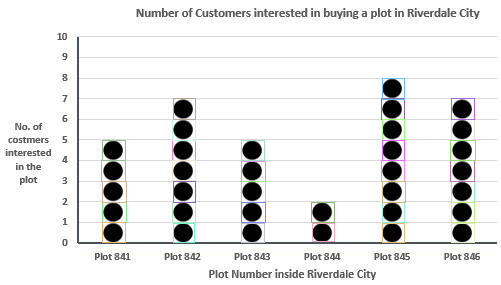

In [84]:
img = Image.open(all_images_path/val_file_names[0])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

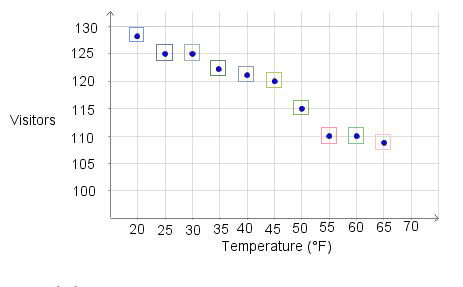

In [85]:
img = Image.open(all_images_path/val_file_names[1])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

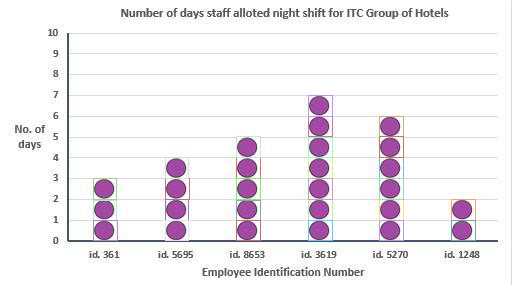

In [86]:
img = Image.open(all_images_path/val_file_names[2])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

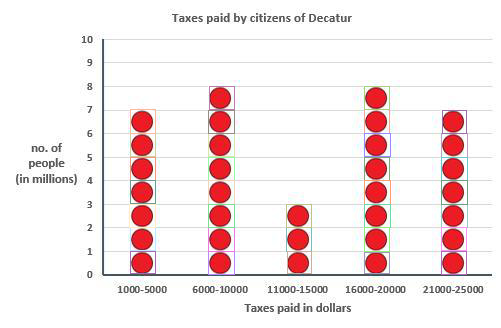

In [87]:
img = Image.open(all_images_path/val_file_names[3])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

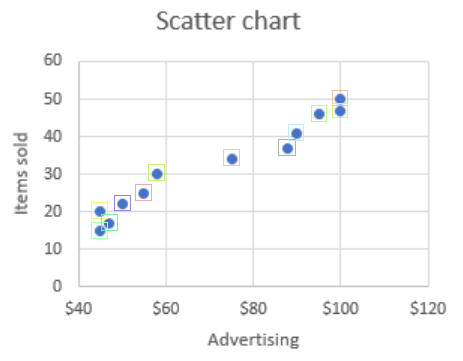

In [88]:
img = Image.open(all_images_path/val_file_names[4])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

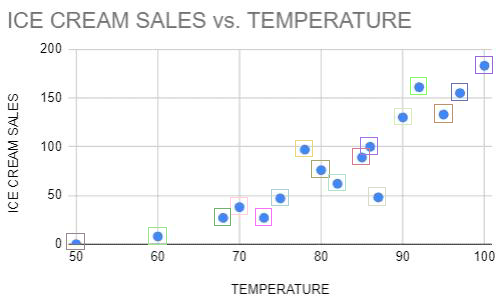

In [89]:
img = Image.open(all_images_path/val_file_names[5])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

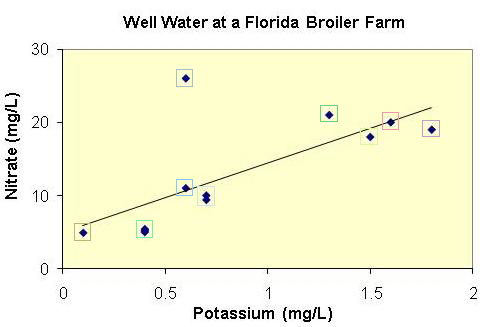

In [90]:
img = Image.open(all_images_path/val_file_names[6])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

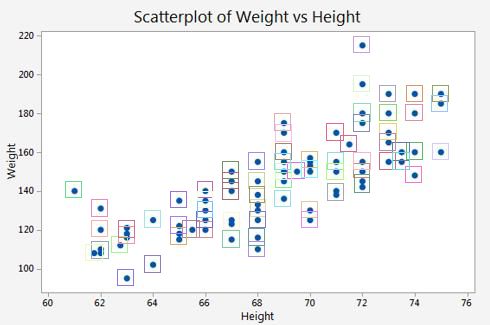

In [91]:
img = Image.open(all_images_path/val_file_names[7])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

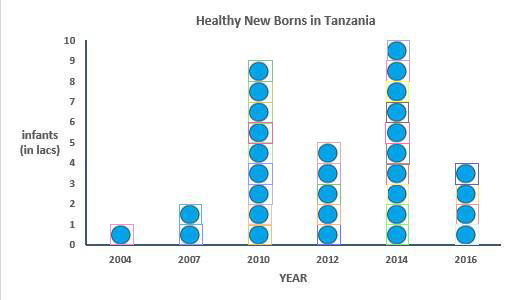

In [92]:
img = Image.open(all_images_path/val_file_names[8])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

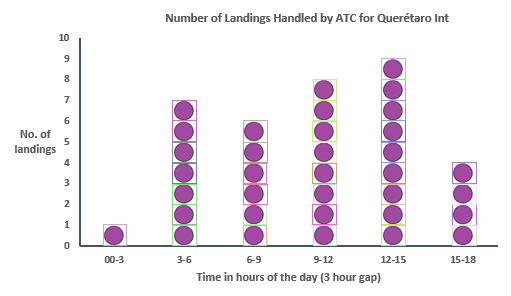

In [93]:
img = Image.open(all_images_path/val_file_names[9])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

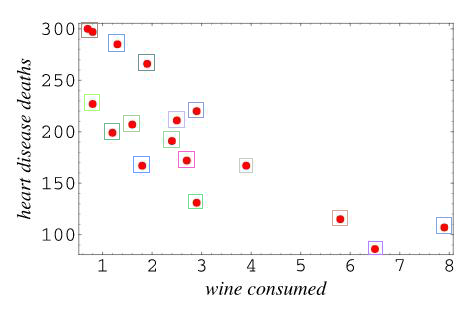

In [94]:
img = Image.open(all_images_path/val_file_names[10])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

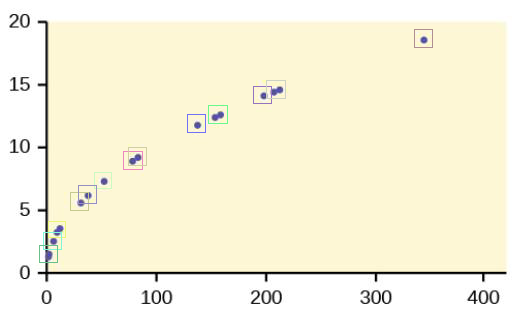

In [95]:
img = Image.open(all_images_path/val_file_names[11])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

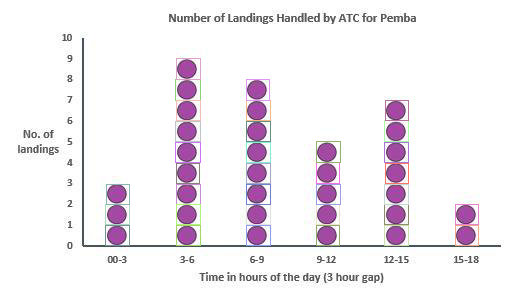

In [96]:
img = Image.open(all_images_path/val_file_names[12])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

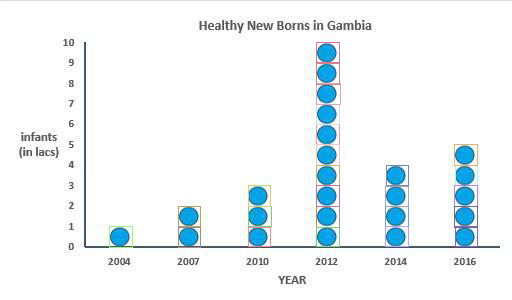

In [97]:
img = Image.open(all_images_path/val_file_names[13])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

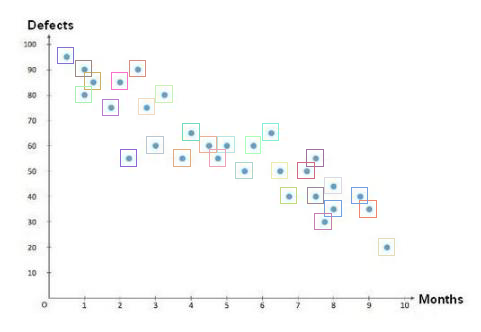

In [98]:
img = Image.open(all_images_path/val_file_names[14])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

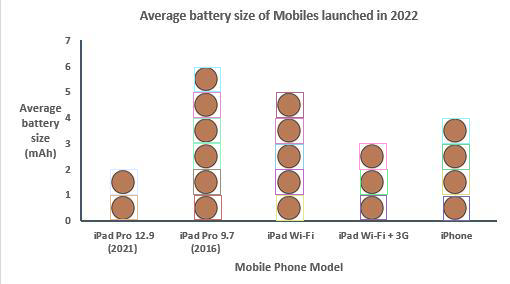

In [99]:
img = Image.open(all_images_path/val_file_names[15])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

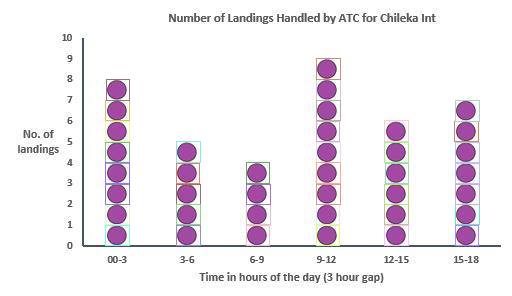

In [100]:
img = Image.open(all_images_path/val_file_names[16])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

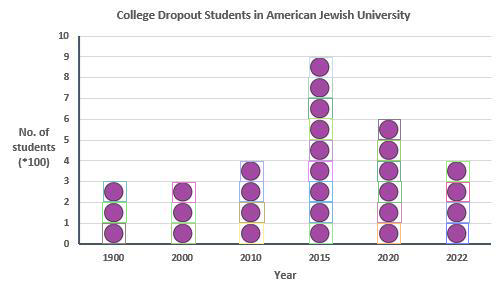

In [101]:
img = Image.open(all_images_path/val_file_names[17])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

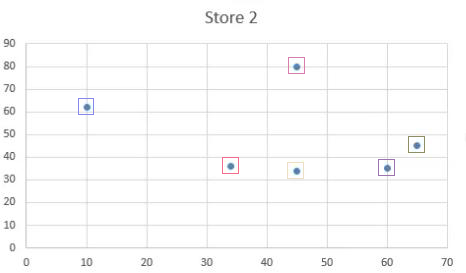

In [102]:
img = Image.open(all_images_path/val_file_names[18])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

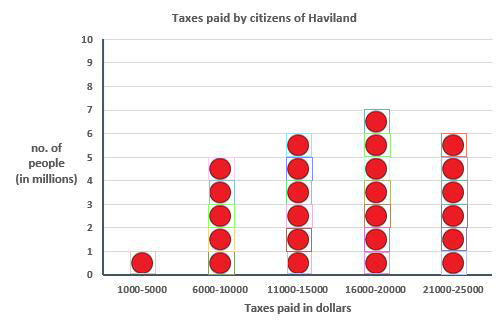

In [103]:
img = Image.open(all_images_path/val_file_names[19])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

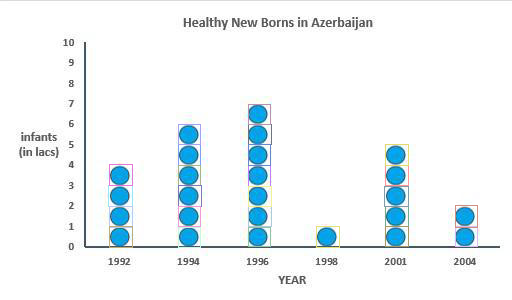

In [104]:
img = Image.open(all_images_path/val_file_names[20])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

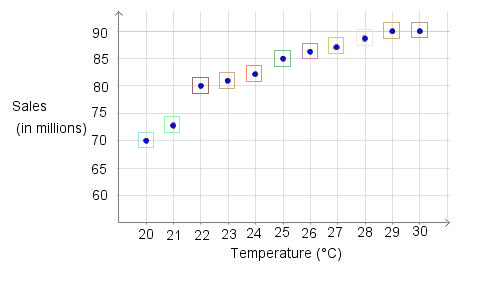

In [105]:
img = Image.open(all_images_path/val_file_names[21])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

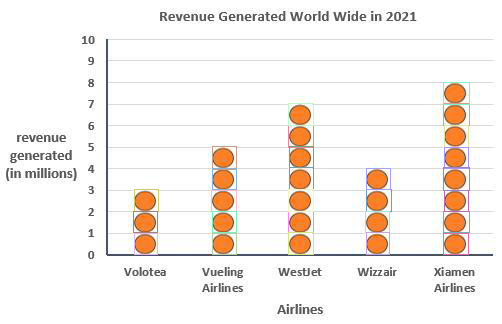

In [106]:
img = Image.open(all_images_path/val_file_names[22])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

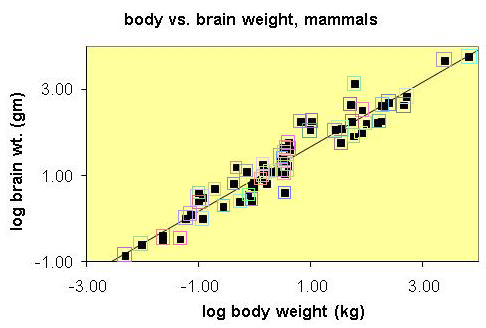

In [107]:
img = Image.open(all_images_path/val_file_names[23])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

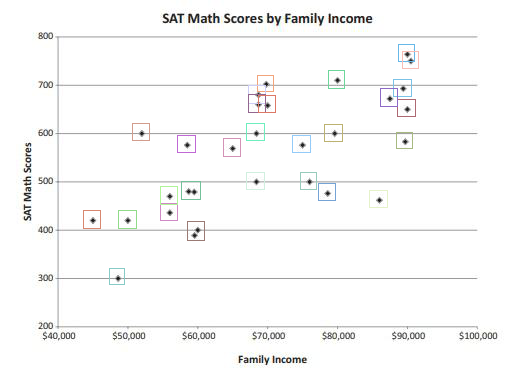

In [108]:
img = Image.open(all_images_path/val_file_names[24])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

I've run the `model_type.interp.plot_top_losses()` method on a separate instance, and gathered the file names of the top loss images. We'll examine the predictions on these images below.

In [109]:
top_loss_images = [
    'c6350443191a.jpg',
    '366b69368f99.jpg',
    '536b28ae1a7e.jpg',
    '9b62dbdded7b.jpg',
    'ca30ad3528c4.jpg',
    'c226d88f9d0d.jpg',
    '00f5404753cf.jpg',
    '5fd0b2fd2087.jpg', 
    '0ccb2bf2bafd.jpg',
    'b99a20b437b4.jpg', 
    '6ae113ad2454.jpg', 
    'c7c5aeda29c3.jpg'
]

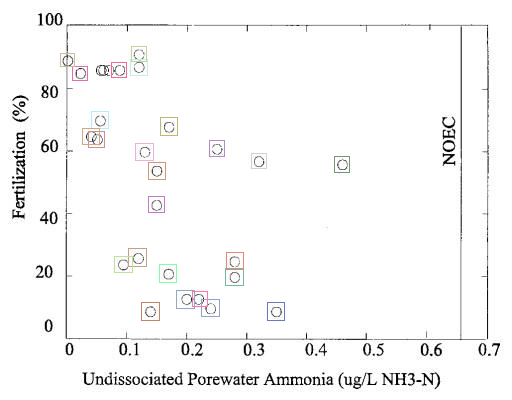

In [110]:
img = Image.open(all_images_path/top_loss_images[0])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

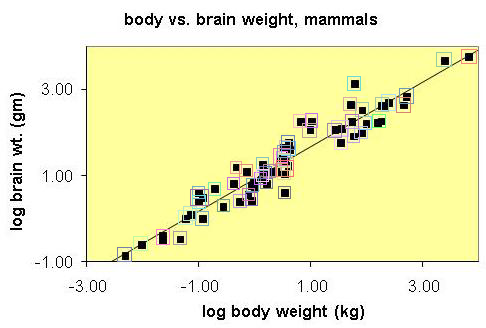

In [111]:
img = Image.open(all_images_path/top_loss_images[1])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

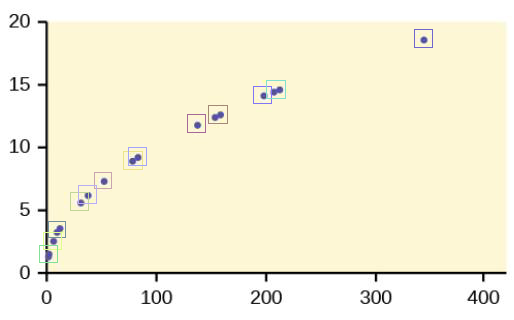

In [112]:
img = Image.open(all_images_path/top_loss_images[2])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

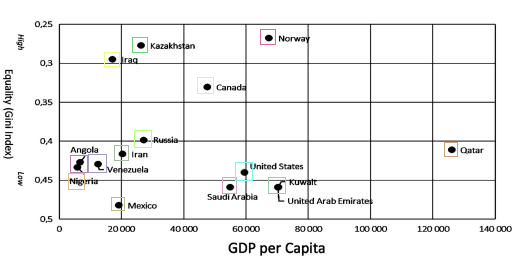

In [113]:
img = Image.open(all_images_path/top_loss_images[3])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

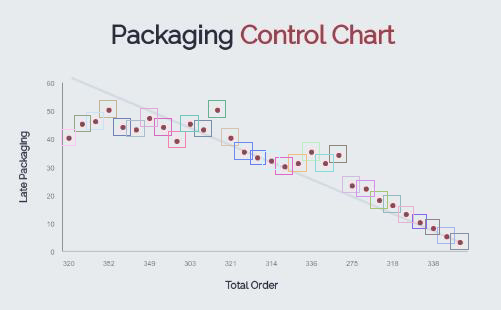

In [114]:
img = Image.open(all_images_path/top_loss_images[4])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

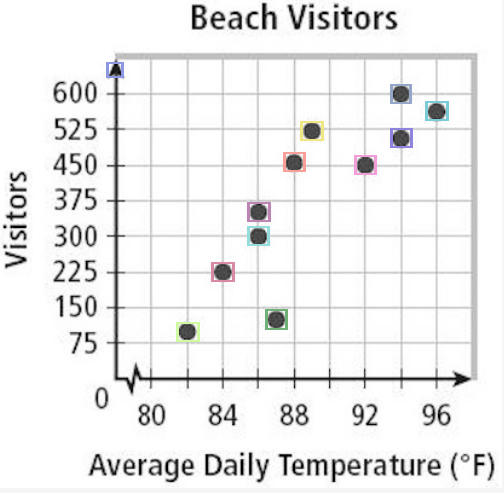

In [115]:
img = Image.open(all_images_path/top_loss_images[5])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

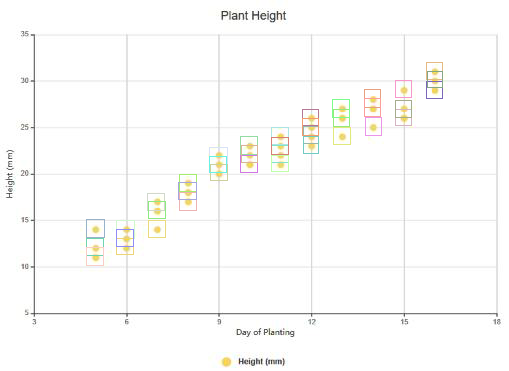

In [116]:
img = Image.open(all_images_path/top_loss_images[6])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

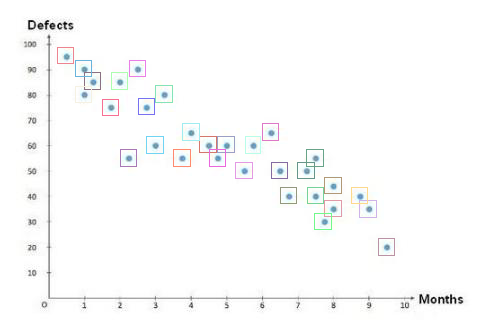

In [117]:
img = Image.open(all_images_path/top_loss_images[7])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

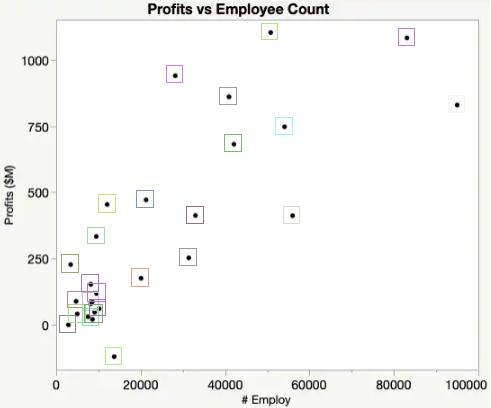

In [118]:
img = Image.open(all_images_path/top_loss_images[8])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

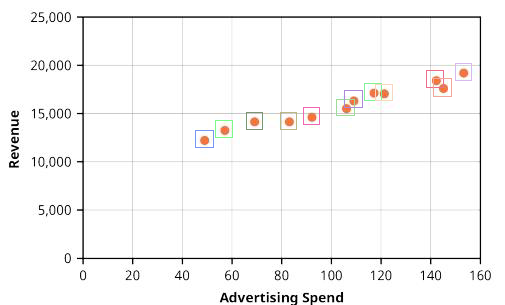

In [119]:
img = Image.open(all_images_path/top_loss_images[9])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

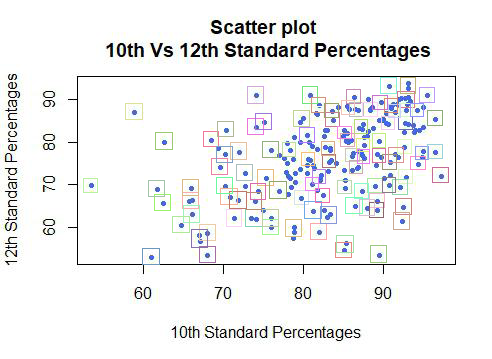

In [120]:
img = Image.open(all_images_path/top_loss_images[10])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

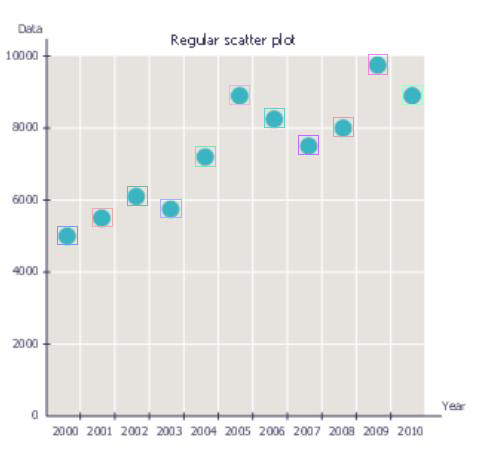

In [121]:
img = Image.open(all_images_path/top_loss_images[11])
pred_dict = model_type.end2end_detect(img, val_tfms, loaded_model, class_map=class_map, detection_threshold=0.5, display_label=False)
pred_dict['img']

In [122]:
# Cleanup:
!rm -r /kaggle/working/all_dot_scatter_images/
!rm -r /kaggle/working/all_dot_scatter_VOC_XML_files/
!rm /kaggle/working/icevision_install.sh